In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

In [4]:
scores=pd.read_csv("../Input_for_Models/Mutational_load_scores_new.csv")
scores=scores.rename({"Unnamed: 0":"Sample"},axis=1)
scores=scores.set_index("Sample")

In [5]:
scores.describe()

,LRRK2 subgraph,CRH subgraph,Apoptosis signaling subgraph,Caspase subgraph,Regulation of cytoskeleton subgraph,Innate immune system subgraph,Disaccharide metabolism subgraph,Wnt signaling subgraph,Energy metabolic subgraph,Cell cycle subgraph,...,Chaperone subgraph,MAPK subgraph,Neurotrophic subgraph,Synuclein subgraph,Bcl-2 subgraph,Interleukin signaling subgraph,Notch signaling subgraph,Calcium-dependent signal transduction,Transport related subgraph,Matrix metalloproteinase subgraph
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.650897,0.427485,0.473923,0.662565,0.470544,0.391733,0.018868,0.407638,0.409059,0.470993,...,0.672778,0.089623,0.675058,0.462771,0.672778,1.038679,0.404160,0.631579,0.700000,1.330189
std,0.256250,0.461278,0.435535,0.249469,0.430757,0.524512,0.136705,0.567175,0.566347,0.404104,...,0.267396,0.183309,0.265065,0.413613,0.267396,0.597865,0.558820,0.353399,0.562478,0.686214
min,0.197044,0.049180,0.060567,0.212560,0.068790,0.023291,0.000000,0.015464,0.015437,0.067616,...,0.170103,0.000000,0.173469,0.073260,0.170103,0.000000,0.015228,0.000000,0.000000,0.000000
25%,0.418719,0.100492,0.159794,0.433575,0.157962,0.030240,0.000000,0.017182,0.020583,0.179419,...,0.432990,0.000000,0.438776,0.161477,0.432990,0.800000,0.018613,0.473684,0.200000,1.000000
50%,0.610837,0.137377,0.230026,0.613527,0.233758,0.032307,0.000000,0.024055,0.025729,0.245552,...,0.639175,0.000000,0.642857,0.239316,0.639175,1.000000,0.027073,0.526316,0.800000,1.000000
75%,0.832512,0.902787,0.894330,0.845411,0.884076,0.949662,0.000000,0.996564,0.996569,0.849051,...,0.855670,0.055556,0.857143,0.857143,0.855670,1.700000,0.981387,0.894737,1.000000,2.000000
max,1.137931,1.739672,1.751289,1.115942,1.731210,1.869271,1.000000,1.975945,1.975986,1.638197,...,1.190722,0.777778,1.183673,1.667888,1.190722,2.000000,1.969543,1.684211,2.000000,2.000000


In [6]:
scores.loc[:, (scores != 0).any(axis=0)] # no zeros

,LRRK2 subgraph,CRH subgraph,Apoptosis signaling subgraph,Caspase subgraph,Regulation of cytoskeleton subgraph,Innate immune system subgraph,Disaccharide metabolism subgraph,Wnt signaling subgraph,Energy metabolic subgraph,Cell cycle subgraph,...,Chaperone subgraph,MAPK subgraph,Neurotrophic subgraph,Synuclein subgraph,Bcl-2 subgraph,Interleukin signaling subgraph,Notch signaling subgraph,Calcium-dependent signal transduction,Transport related subgraph,Matrix metalloproteinase subgraph
Sample,,,,,,,,,,,,,,,,,,,,,
AET0044,0.561576,0.902951,0.894330,0.589372,0.884076,0.948911,0.0,0.996564,0.996569,0.855279,...,0.587629,0.000000,0.586735,0.857143,0.587629,0.9,0.981387,0.473684,1.6,1.0
AET0380,1.073892,0.169180,0.293814,1.072464,0.290446,0.030053,0.0,0.017182,0.018868,0.336892,...,1.123711,0.000000,1.122449,0.283272,1.123711,0.9,0.016920,0.473684,0.0,2.0
AET0027,0.448276,0.080656,0.121134,0.478261,0.128662,0.029301,0.0,0.017182,0.018868,0.179122,...,0.432990,0.388889,0.433673,0.169719,0.432990,0.1,0.028765,0.421053,1.0,1.0
AET0049,0.640394,0.112131,0.181701,0.666667,0.179618,0.030804,0.0,0.018900,0.020583,0.190985,...,0.670103,0.000000,0.673469,0.181929,0.670103,1.5,0.018613,0.789474,0.0,2.0
AET0006,1.078818,0.967213,1.020619,1.057971,1.017834,0.948911,0.0,0.996564,0.996569,0.982206,...,1.092784,0.388889,1.086735,0.976801,1.092784,0.9,0.993232,0.842105,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,0.236453,0.051803,0.067010,0.270531,0.075159,0.028550,0.0,0.018900,0.020583,0.103203,...,0.211340,0.388889,0.219388,0.081807,0.211340,0.0,0.030457,0.368421,0.8,0.0
AET0071,0.669951,0.113443,0.186856,0.695652,0.184713,0.027799,0.0,0.015464,0.015437,0.173191,...,0.701031,0.000000,0.704082,0.188034,0.701031,1.8,0.015228,0.947368,1.0,2.0
AET0138,0.822660,0.139016,0.233247,0.845411,0.231847,0.034560,0.0,0.025773,0.029160,0.249110,...,0.855670,0.055556,0.857143,0.231990,0.855670,1.7,0.027073,0.947368,0.8,1.0


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykern

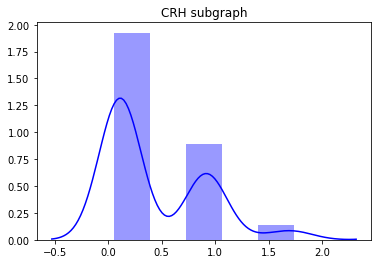

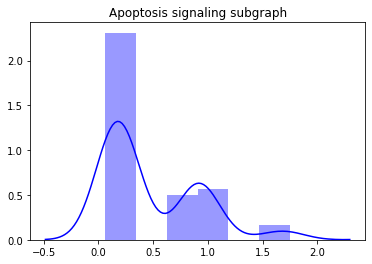

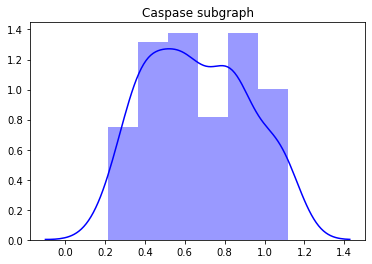

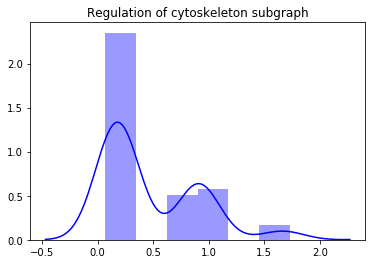

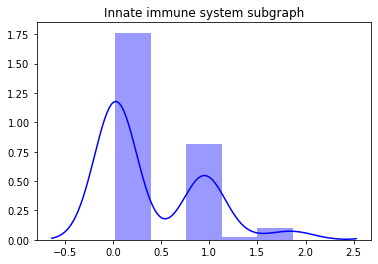

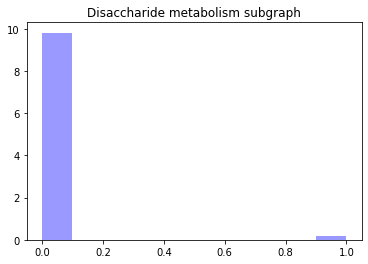

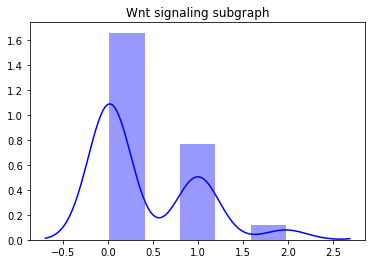

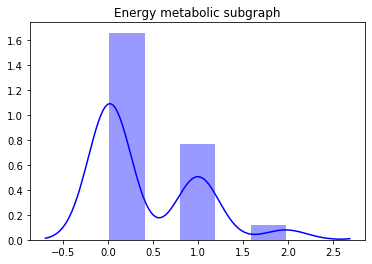

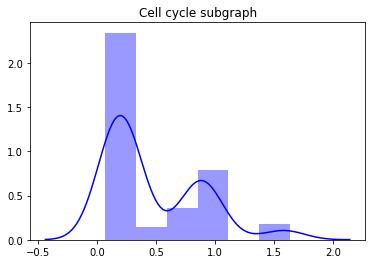

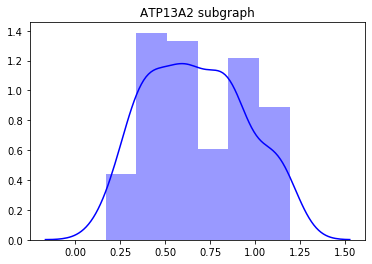

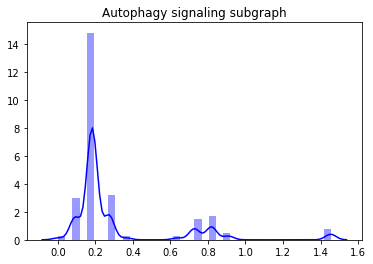

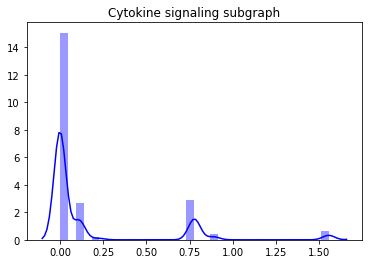

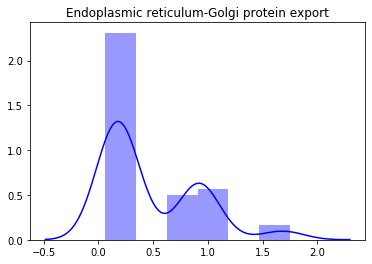

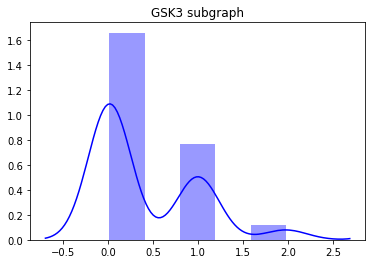

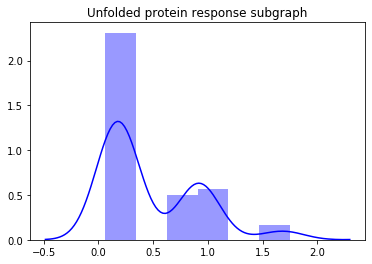

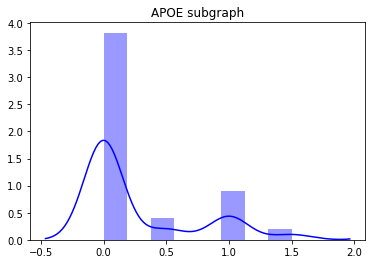

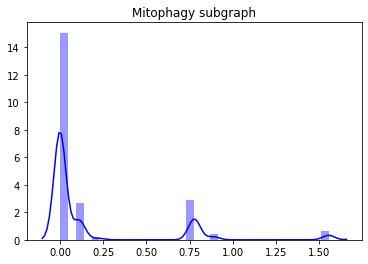

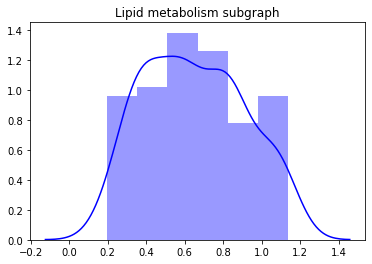

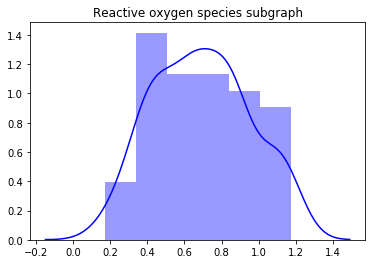

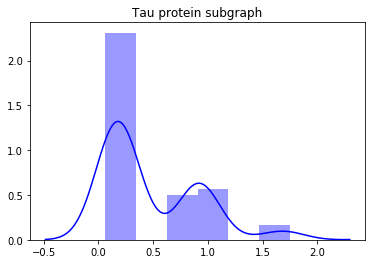

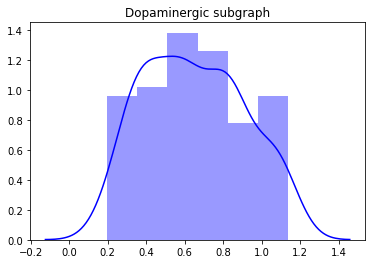

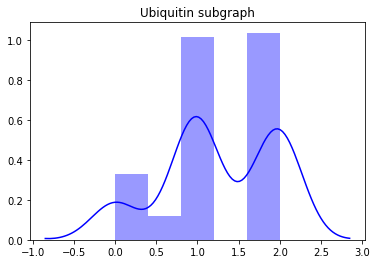

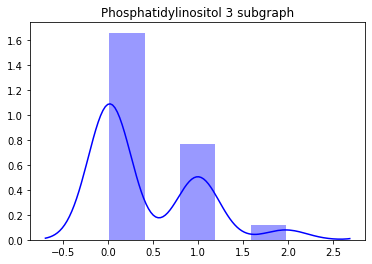

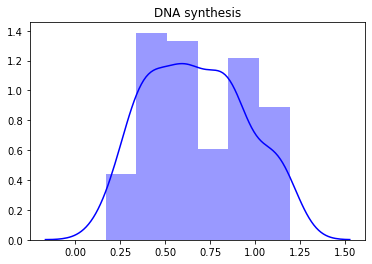

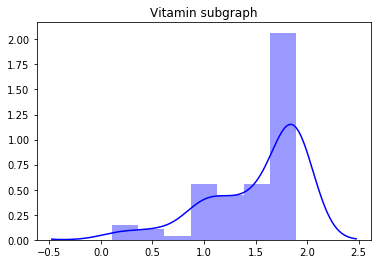

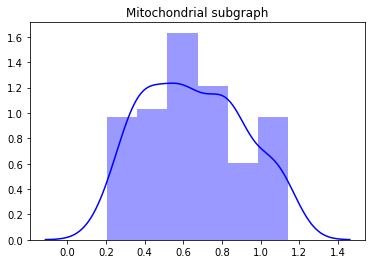

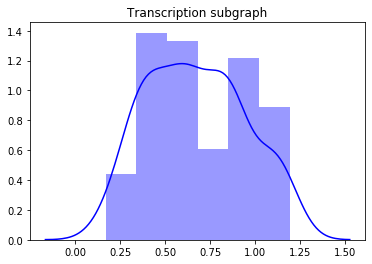

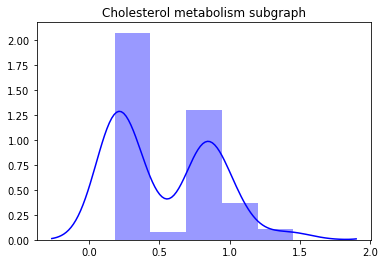

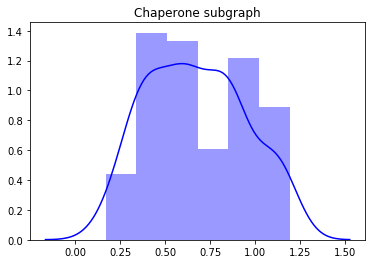

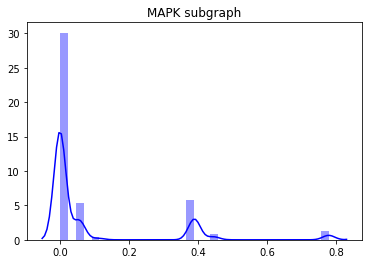

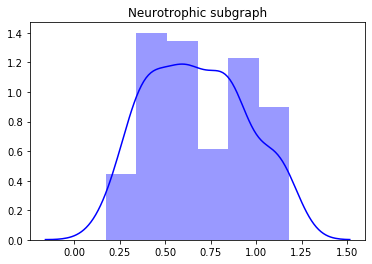

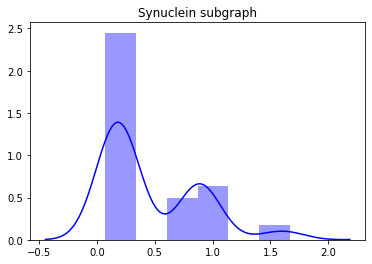

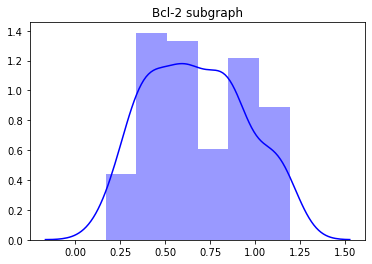

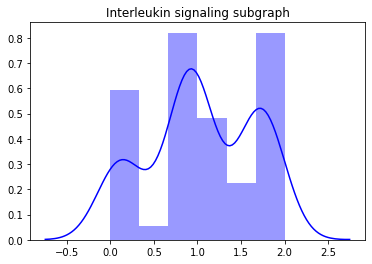

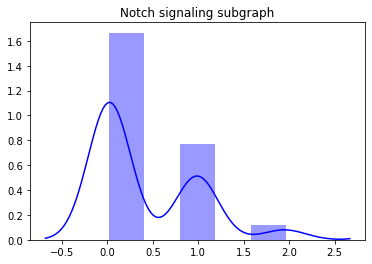

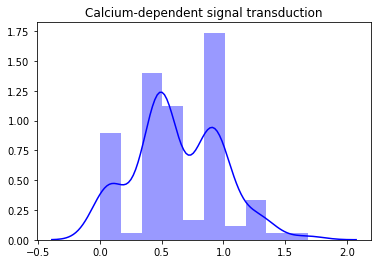

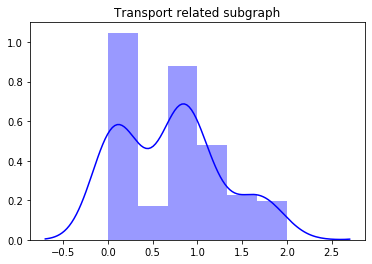

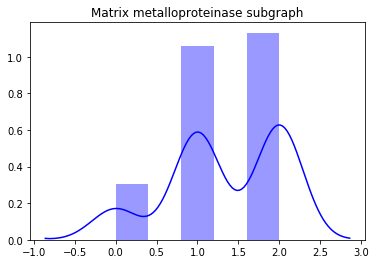

In [7]:
# plot them raw scores
for mechanism in scores.columns[1:]:
    plt.figure(mechanism)
    sns.distplot(scores[[mechanism]], hist=True, rug=False,color="Blue").set_title(mechanism)

In [8]:
# scales them 
scores_scaled = pd.DataFrame(preprocessing.scale(scores))

In [9]:
scores_scaled.columns=scores.columns

In [10]:
scores_scaled.index=scores.index

In [11]:
scores_scaled

,LRRK2 subgraph,CRH subgraph,Apoptosis signaling subgraph,Caspase subgraph,Regulation of cytoskeleton subgraph,Innate immune system subgraph,Disaccharide metabolism subgraph,Wnt signaling subgraph,Energy metabolic subgraph,Cell cycle subgraph,...,Chaperone subgraph,MAPK subgraph,Neurotrophic subgraph,Synuclein subgraph,Bcl-2 subgraph,Interleukin signaling subgraph,Notch signaling subgraph,Calcium-dependent signal transduction,Transport related subgraph,Matrix metalloproteinase subgraph
Sample,,,,,,,,,,,,,,,,,,,,,
AET0044,-0.350224,1.035653,0.969850,-0.294789,0.964573,1.067326,-0.138675,1.043282,1.042298,0.955476,...,-0.319950,-0.491239,-0.334795,0.958011,-0.319950,-0.233060,1.037848,-0.448911,1.607665,-0.483460
AET0380,1.658555,-0.562637,-0.415498,1.650890,-0.420084,-0.692832,-0.138675,-0.691693,-0.692234,-0.333425,...,1.694401,-0.491239,1.695871,-0.436040,1.694401,-0.233060,-0.696252,-0.448911,-1.250406,0.980734
AET0027,-0.794474,-0.755460,-0.813860,-0.742295,-0.797448,-0.694271,-0.138675,-0.691693,-0.692234,-0.725699,...,-0.901013,1.640337,-0.914986,-0.711884,-0.901013,-1.577512,-0.674956,-0.598548,0.535888,-0.483460
AET0049,-0.041181,-0.686900,-0.674136,0.016520,-0.678593,-0.691393,-0.138675,-0.688649,-0.689191,-0.696204,...,-0.010050,-0.491239,-0.006021,-0.682223,-0.010050,0.775280,-0.693209,0.448911,-1.250406,0.980734
AET0006,1.677870,1.175628,1.261190,1.592520,1.276567,1.067326,-0.138675,1.043282,1.042298,1.271065,...,1.578189,1.640337,1.560494,1.248685,1.578189,-0.233060,1.059144,0.598548,0.535888,-1.947655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AET0021,-1.625027,-0.818306,-0.938720,-1.578937,-0.922245,-0.695710,-0.138675,-0.688649,-0.689191,-0.914462,...,-1.733870,1.640337,-1.727253,-0.925440,-1.733870,-1.745569,-0.671913,-0.748185,0.178629,-1.947655
AET0071,0.074710,-0.684044,-0.662244,0.133261,-0.666708,-0.697149,-0.138675,-0.694737,-0.698320,-0.740446,...,0.106163,-0.491239,0.110017,-0.667393,0.106163,1.279449,-0.699294,0.897822,0.535888,0.980734
AET0138,0.673480,-0.628339,-0.555222,0.736421,-0.556767,-0.684197,-0.138675,-0.676474,-0.673975,-0.551682,...,0.687226,-0.186728,0.690208,-0.560614,0.687226,1.111393,-0.677998,0.897822,0.178629,-0.483460


/home/tlordick/condaenv/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tlordick/condaenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykern

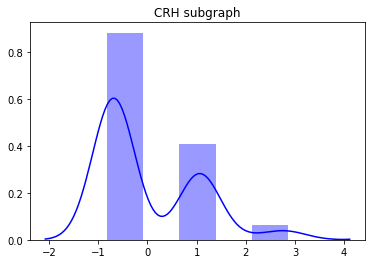

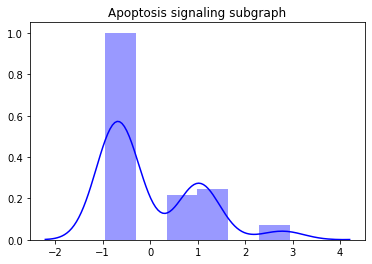

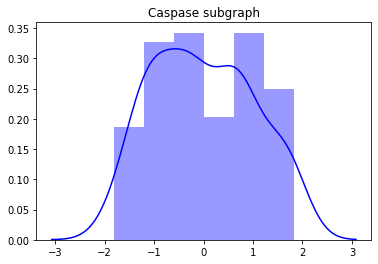

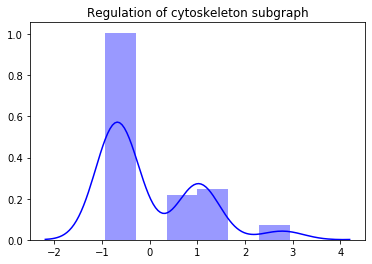

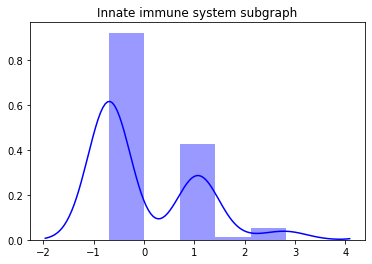

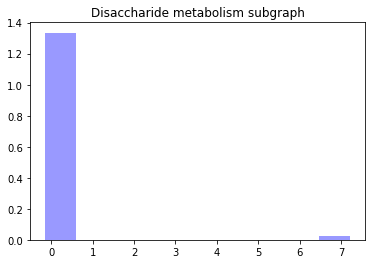

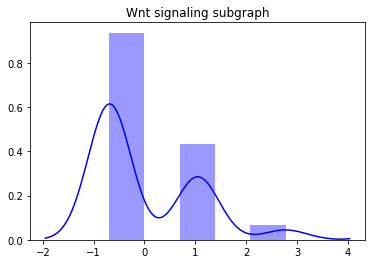

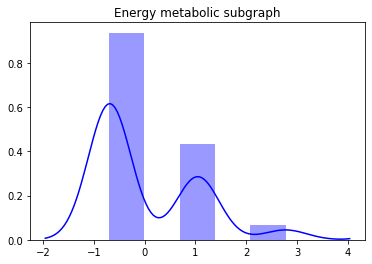

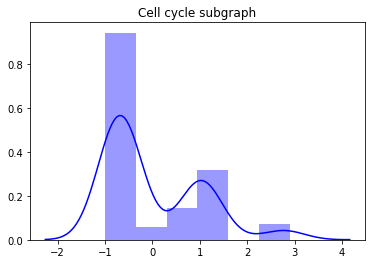

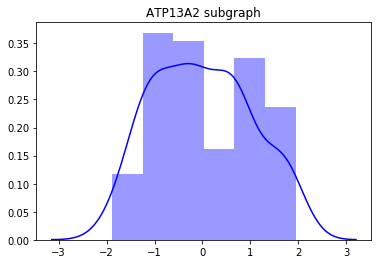

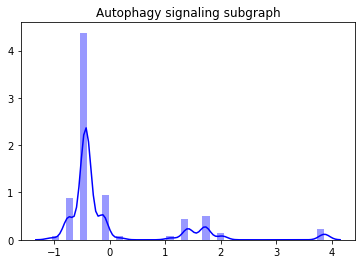

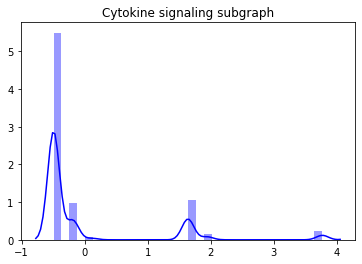

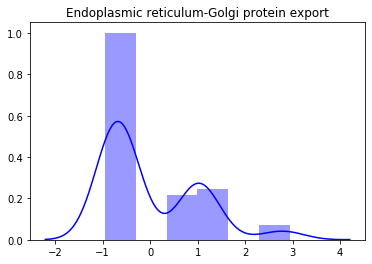

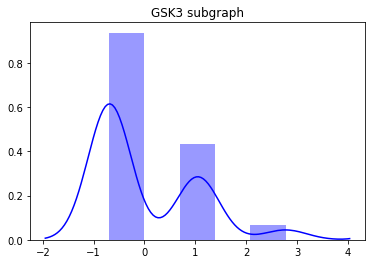

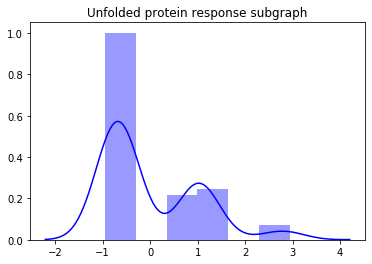

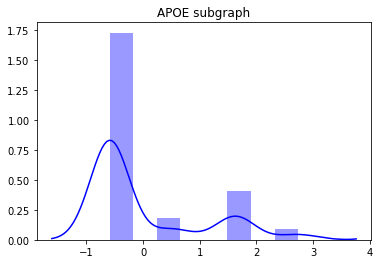

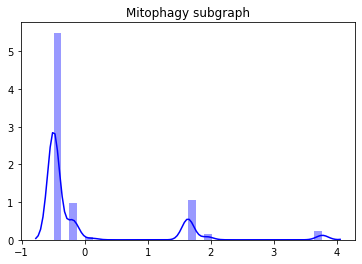

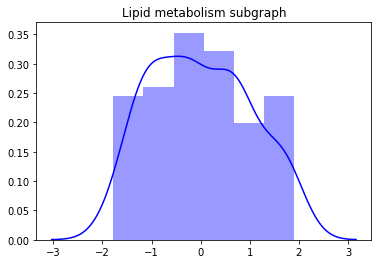

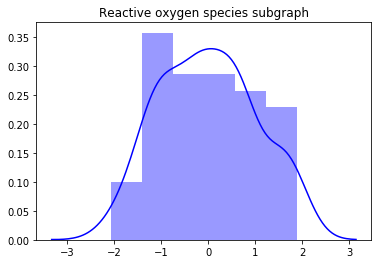

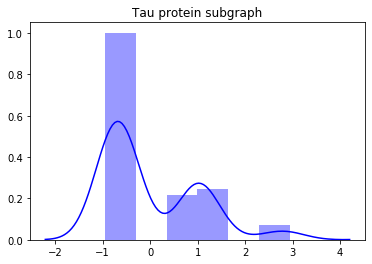

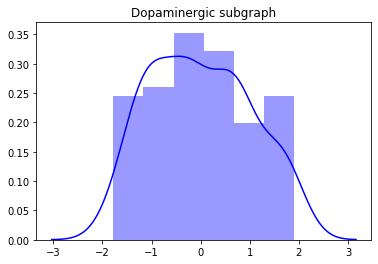

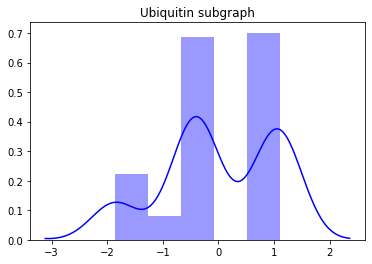

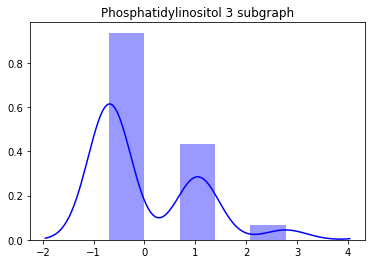

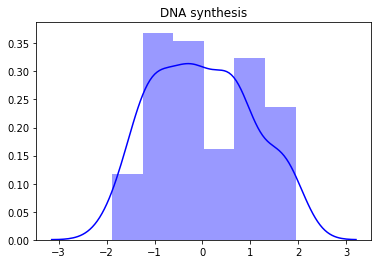

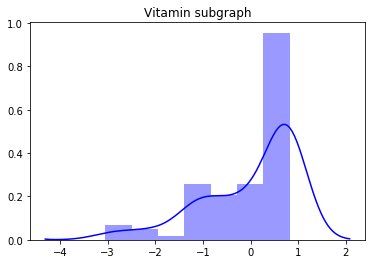

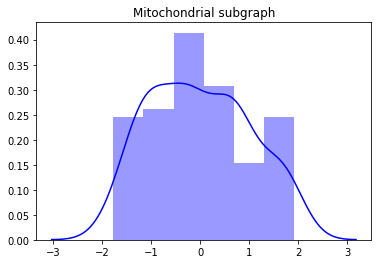

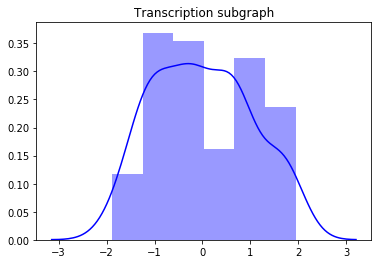

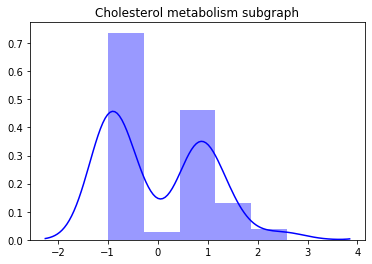

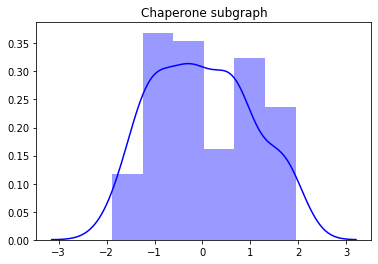

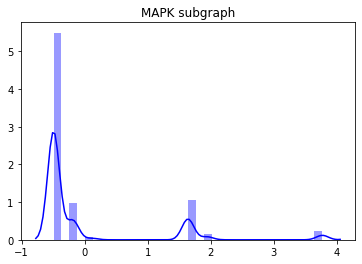

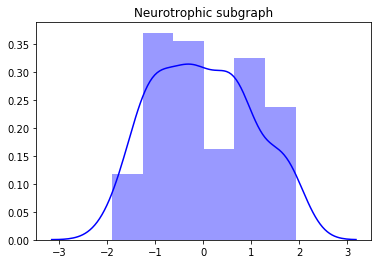

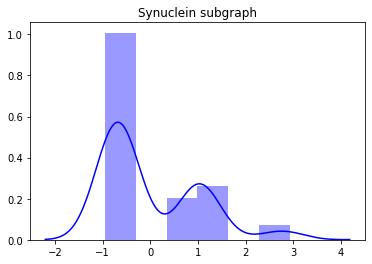

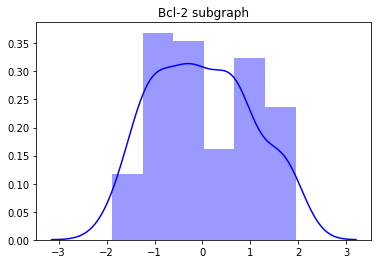

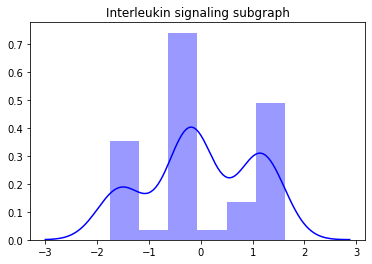

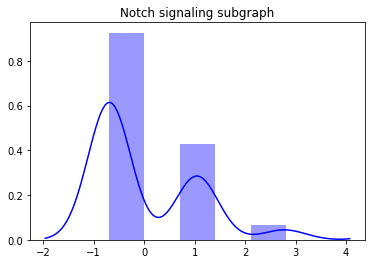

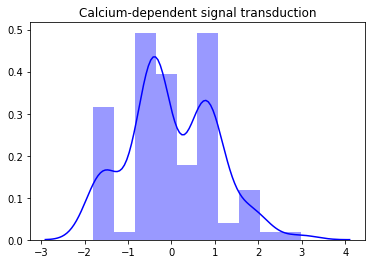

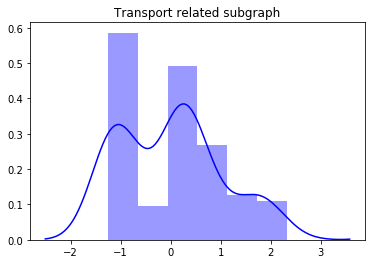

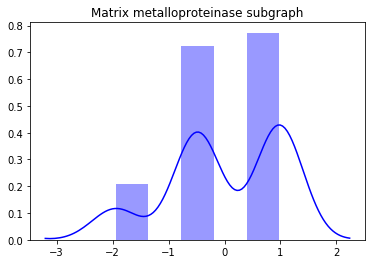

In [12]:
# plot them scaled scores
for mechanism in scores_scaled.columns[1:]:
    plt.figure(mechanism)
    sns.distplot(scores_scaled[[mechanism]], hist=True, rug=False,color="Blue").set_title(mechanism)

In [13]:
scores_scaled.to_csv("../Input_for_Models/Mutational_load_scores_new_scaled.csv",header=True,index=True)